# Hotel Booking cansellation prediction

**Introduction to the case**

* Nowadays, the hotel industry is facing a significant challenge of increasing booking cancellations. This issue is negatively affecting hotel revenue and complicating future planning for room arrangements.

* This study mainly focuses on the prediction of the cancellation of hotel bookings. At last, the user will be able to get a better idea about the probability of the cancellation of a specific booking.

**About the dataset**

* The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.
this data set contanis 31 features and 199K entries.

**imports**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

**load the dataset**

In [2]:
data = pd.read_csv("hotel_bookings.csv")

**Display the first few rows**

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**data description**

In [4]:
data.describe() 

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**information about the dataset**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
data.shape 

(119390, 32)

**Checking Null Values**

In [7]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**missing values percentages caluculation**

In [8]:
missing_percentages = (data.isnull().sum() / len(data)) * 100
print(missing_percentages)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

**Visualize missing values using a heatmap**

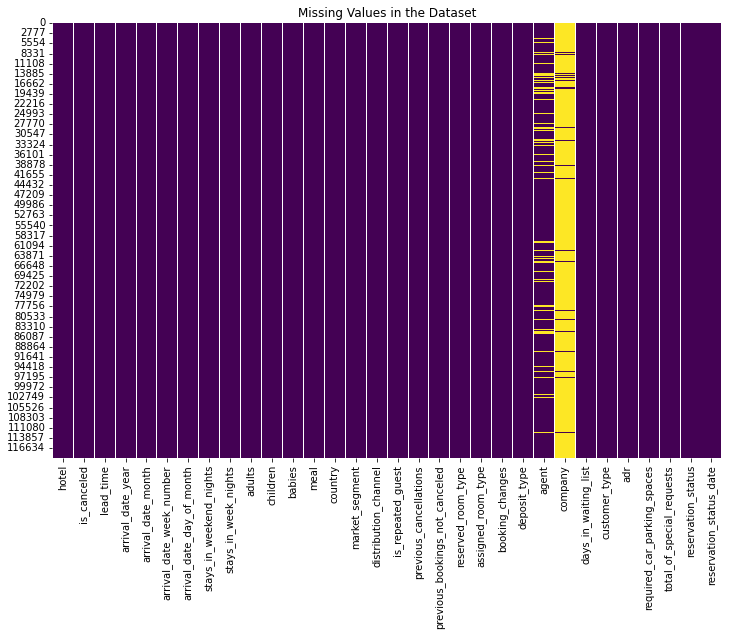

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in the Dataset")
plt.show()

**handling missing values**

In [10]:
data['children'] = data['children'].fillna(0)
data['agent'] = data['agent'].fillna(0)
data['country'] = data['country'].fillna(data['country'].mode()[0])
data.drop('company', axis=1, inplace=True)

**confirming no missing values**

In [11]:
print("Null Values After Cleaning:")
print(data.isnull().sum())

Null Values After Cleaning:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0


**remove duplicates**

In [13]:
data['agent']= data['agent'].astype(int)
data['country']= data['country'].astype(str)
# Remove duplicate rows
data = data.drop_duplicates()

In [14]:
data.shape 

(87370, 31)

**data types**

In [15]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [17]:
categorical_features = data.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')


In [18]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical feature
for col in categorical_features:
    data[col] = label_encoder.fit_transform(data[col])

In [19]:
cat_data = data[[x for x in categorical_features]]

In [20]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87370 entries, 0 to 119389
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   hotel                    87370 non-null  int64
 1   arrival_date_month       87370 non-null  int64
 2   meal                     87370 non-null  int64
 3   country                  87370 non-null  int64
 4   market_segment           87370 non-null  int64
 5   distribution_channel     87370 non-null  int64
 6   reserved_room_type       87370 non-null  int64
 7   assigned_room_type       87370 non-null  int64
 8   deposit_type             87370 non-null  int64
 9   customer_type            87370 non-null  int64
 10  reservation_status       87370 non-null  int64
 11  reservation_status_date  87370 non-null  int64
dtypes: int64(12)
memory usage: 8.7 MB


**correct the wrong data types**

In [297]:
# data['children'] = data['children'].astype(int)  # Convert 'children' to int
data['agent'] = data['agent'].astype(int)  # Convert 'agent' to int

**confirming the datatypes**

In [298]:
# print(data['children'].dtype)
print(data['agent'].dtype)

int64
int64


**data columns**

In [299]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

**dataset analysis**

**histogram**

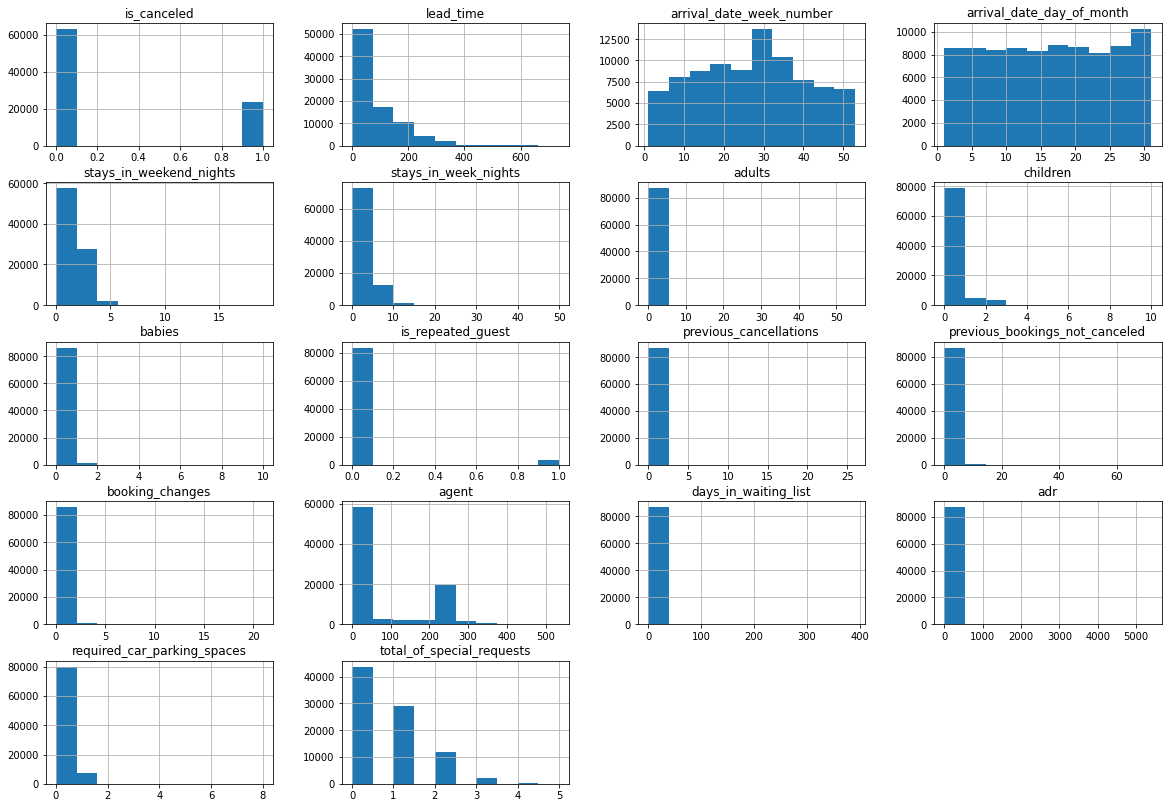

In [300]:
data.hist(figsize=(20,14))
plt.show()

**Correlation Heatmap**

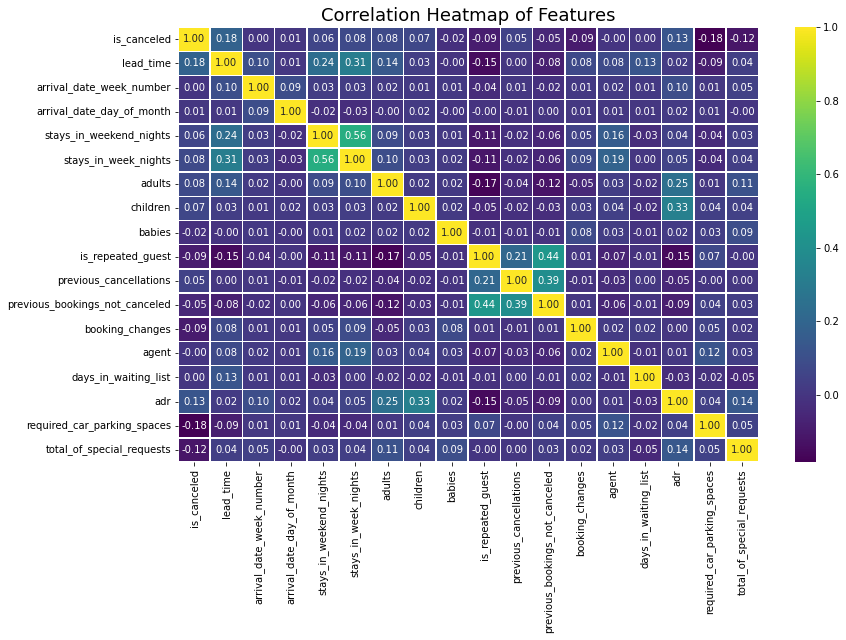

In [301]:
# Increase figure size
plt.figure(figsize=(13, 8))  # Adjust the width and height as needed

# Create the heatmap with annotation and customization
sns.heatmap(data.corr(), annot=True, cmap='viridis', linewidths=0.5, fmt=".2f", annot_kws={"size": 10})

# Add title for context
plt.title('Correlation Heatmap of Features', fontsize=18)

# Show the plot
plt.show()

In [302]:
list_1 = list(data.columns)


In [303]:
# Step 2: Print each column name and its values
for col in list_1:
    print(f"Column: {col}")
    print(data[col].values)
    print("-" * 50)

Column: hotel
['Resort Hotel' 'Resort Hotel' 'Resort Hotel' ... 'City Hotel'
 'City Hotel' 'City Hotel']
--------------------------------------------------
Column: is_canceled
[0 0 0 ... 0 0 0]
--------------------------------------------------
Column: lead_time
[342 737   7 ...  34 109 205]
--------------------------------------------------
Column: arrival_date_month
['July' 'July' 'July' ... 'August' 'August' 'August']
--------------------------------------------------
Column: arrival_date_week_number
[27 27 27 ... 35 35 35]
--------------------------------------------------
Column: arrival_date_day_of_month
[ 1  1  1 ... 31 31 29]
--------------------------------------------------
Column: stays_in_weekend_nights
[0 0 0 ... 2 2 2]
--------------------------------------------------
Column: stays_in_week_nights
[0 0 1 ... 5 5 7]
--------------------------------------------------
Column: adults
[2 2 1 ... 2 2 2]
--------------------------------------------------
Column: children
[0 0 0 

**Scaling data**

In [304]:
# Separate the target variable
y = data['is_canceled']
x = data.drop('is_canceled', axis=1)



In [305]:
# Step 1: Identify categorical columns
categorical_features = x.select_dtypes(include=['object']).columns


In [306]:
x = pd.get_dummies(x, columns=categorical_features, drop_first=True)

In [307]:
# Step 3: Identify numerical columns
numerical_features = x.select_dtypes(include=['float64', 'int64']).columns

In [308]:
# Step 4: Apply Standard Scaling to numerical columns
scaler = StandardScaler()
x[numerical_features] = scaler.fit_transform(x[numerical_features])

In [309]:
# Step 5: Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [310]:
# Verify the lengths of the splits
print(len(x_train))
print(len(x_test))

# Output the preprocessed dataset
x_train

69699
17425


,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
16296,0.747647,0.523850,0.020975,0.964102,1.157222,0.197958,-0.304386,-0.095438,-0.20195,-0.081851,...,0,0,0,0,0,0,1,0,1,0
88293,-0.264626,0.304447,-1.676859,-0.974695,-0.304960,-1.397502,-0.304386,-0.095438,4.95173,2.625499,...,0,0,0,0,0,0,1,0,1,0
44782,-0.136637,1.108926,-0.544970,0.964102,-0.304960,0.197958,-0.304386,-0.095438,-0.20195,-0.081851,...,0,0,0,0,0,0,0,1,0,0
62973,-0.125002,-1.670184,1.039675,-0.974695,-0.304960,0.197958,-0.304386,-0.095438,-0.20195,-0.081851,...,0,0,0,0,0,0,1,0,0,0
76991,-0.311167,0.596985,0.926487,-0.005296,-0.792353,-1.397502,-0.304386,-0.095438,-0.20195,-0.081851,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26112,-0.927838,0.231312,0.586920,-0.974695,-0.792353,0.197958,-0.304386,-0.095438,-0.20195,-0.081851,...,0,0,0,0,0,0,1,0,1,0
62243,-0.823121,-1.889587,-1.224103,6.780493,9.442916,-1.397502,-0.304386,-0.095438,-0.20195,-0.081851,...,0,0,0,0,0,0,1,0,0,0
55922,0.433493,0.596985,0.926487,-0.005296,0.669828,0.197958,-0.304386,-0.095438,-0.20195,-0.081851,...,0,0,0,0,0,0,1,0,0,1
57680,1.189789,0.962657,1.605620,-0.974695,-0.304960,0.197958,-0.304386,-0.095438,-0.20195,-0.081851,...,0,0,0,0,0,0,1,0,0,0


In [311]:
print(y.unique())

[0 1]


**Training and Testing data**

**MODELS**

**logistic regression**

In [312]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
log_reg.fit(x_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(x_test)

# Calculate the accuracy score
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Generate the confusion matrix
conf_log_reg = confusion_matrix(y_test, y_pred_log_reg)

print("Classification Report is:\n",classification_report(y_test,y_pred_reg))
reg = classification_report(y_test, y_pred_log_reg)


Classification Report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12672
           1       1.00      1.00      1.00      4753

    accuracy                           1.00     17425
   macro avg       1.00      1.00      1.00     17425
weighted avg       1.00      1.00      1.00     17425



**KNeighborsClassifier**

In [313]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.9388809182209469
Confusion Matrix : 
[[12363   309]
 [  756  3997]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     12672
           1       0.93      0.84      0.88      4753

    accuracy                           0.94     17425
   macro avg       0.94      0.91      0.92     17425
weighted avg       0.94      0.94      0.94     17425



**Decision tree**

In [314]:
dtree = DecisionTreeClassifier(max_depth=2, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=123)

In [315]:
y_pred=dtree.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

[[12672     0]
 [    0  4753]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12672
           1       1.00      1.00      1.00      4753

    accuracy                           1.00     17425
   macro avg       1.00      1.00      1.00     17425
weighted avg       1.00      1.00      1.00     17425



1.0

**Random Forest Classifier**

In [316]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [317]:
y_pred=rfc.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

[[12672     0]
 [    0  4753]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12672
           1       1.00      1.00      1.00      4753

    accuracy                           1.00     17425
   macro avg       1.00      1.00      1.00     17425
weighted avg       1.00      1.00      1.00     17425



1.0

**Support Vector Machine (SVM)**

In [318]:
svm_clf = SVC()

svm_clf.fit(x_train, y_train)

y_pred_svm = svm_clf.predict(x_test)

print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

Confusion Matrix for SVM:
[[12672     0]
 [   24  4729]]

Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12672
           1       1.00      0.99      1.00      4753

    accuracy                           1.00     17425
   macro avg       1.00      1.00      1.00     17425
weighted avg       1.00      1.00      1.00     17425



**naive bayes**

In [319]:
nb_clf = GaussianNB()

nb_clf.fit(x_train, y_train)
y_pred_nb = nb_clf.predict(x_test)


print("Confusion Matrix for Naive Bayes:")
print(confusion_matrix(y_test, y_pred_nb))

print("\nClassification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

Confusion Matrix for Naive Bayes:
[[12672     0]
 [    0  4753]]

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12672
           1       1.00      1.00      1.00      4753

    accuracy                           1.00     17425
   macro avg       1.00      1.00      1.00     17425
weighted avg       1.00      1.00      1.00     17425



**hyperparameter tuning and model training**

**Tuned Naive Bayes**

In [320]:
gnb = GaussianNB()

param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_nb = GridSearchCV(gnb, param_grid_nb, cv=5)
grid_nb.fit(x_train, y_train)

best_nb = grid_nb.best_estimator_

y_pred_nb = best_nb.predict(x_test)

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12672
           1       1.00      1.00      1.00      4753

    accuracy                           1.00     17425
   macro avg       1.00      1.00      1.00     17425
weighted avg       1.00      1.00      1.00     17425



**Tuned Decision Tree**

In [321]:
dt_clf = DecisionTreeClassifier()

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


grid_dt = GridSearchCV(dt_clf, param_grid_dt, cv=5)
grid_dt.fit(x_train, y_train)


best_dt = grid_dt.best_estimator_


y_pred_dt = best_dt.predict(x_test)


print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

[[12672     0]
 [    0  4753]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12672
           1       1.00      1.00      1.00      4753

    accuracy                           1.00     17425
   macro avg       1.00      1.00      1.00     17425
weighted avg       1.00      1.00      1.00     17425



**Ensemble learning methods**

In [322]:
voting_clf = VotingClassifier(
    estimators=[
        ('dt', best_dt),
        ('knn', knn),
        ('rf', rfc)
    ],
    voting='hard'  
)


voting_clf.fit(x_train, y_train)
y_pred_voting = voting_clf.predict(x_test)


print("Ensemble Voting Classifier Classification Report:\n", classification_report(y_test, y_pred_voting))
print(confusion_matrix(y_test, y_pred_voting))

Ensemble Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12672
           1       1.00      1.00      1.00      4753

    accuracy                           1.00     17425
   macro avg       1.00      1.00      1.00     17425
weighted avg       1.00      1.00      1.00     17425

[[12672     0]
 [    0  4753]]
